# **Importing relevant libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import panel as pn
import datetime
import math

!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets
import hvplot.pandas

pn.extension(comms='colab')

# **Creating Time Series Dataframe**
This includes time series data of the weekly visitors per cinema within the ChrisCo portfolio over a 4 year period

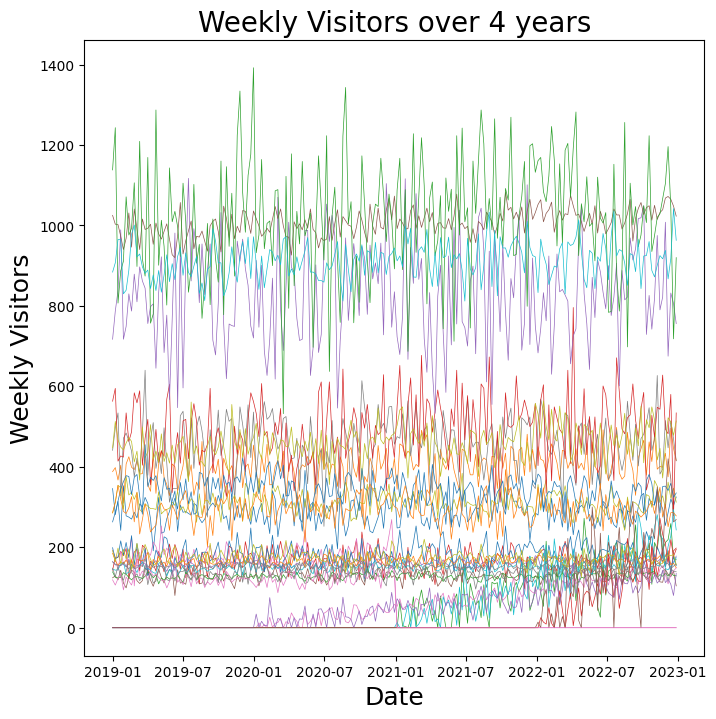

In [ ]:
customer_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaWeeklyVisitors.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
customer_data.index = pd.to_datetime(customer_data.index)

plt.figure(figsize=(8, 8))
plt.plot(customer_data, linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weekly Visitors', fontsize=18)
plt.title('Weekly Visitors over 4 years', fontsize=20)
plt.show()

customer_data = customer_data.reindex(customer_data.mean().sort_values(ascending=False).index, axis=1)
customer_data_mean = customer_data.mean()

# **Total Weekly Visitors over 4 years**
Inputted the total weekly visits for each cinemas over the 4 year period and plotted a barchart to display the difference in high, medium, low and very low volume cinemas.

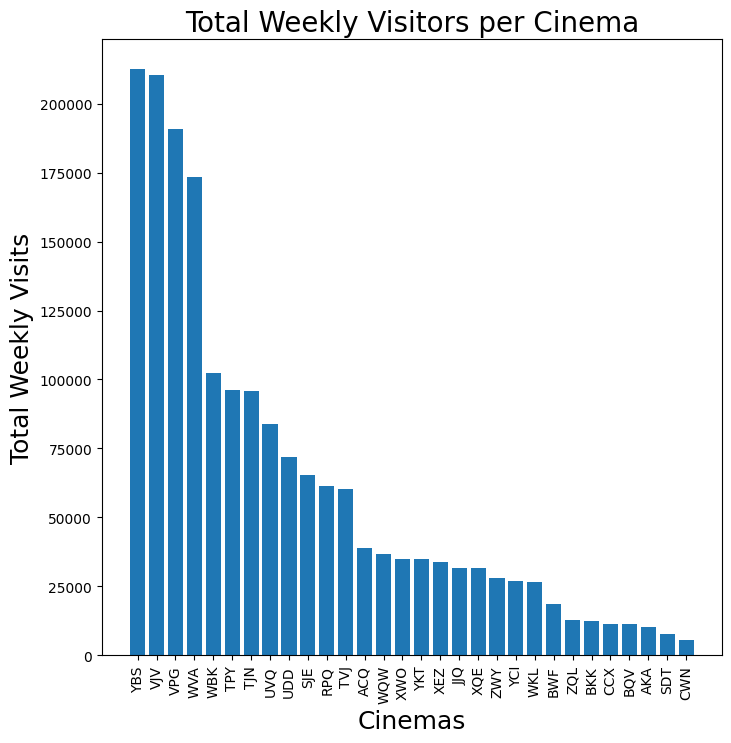

YBS    212668
VJV    210442
VPG    190812
WVA    173378
WBK    102478
TPY     96252
TJN     95668
UVQ     83930
UDD     71783
SJE     65291
RPQ     61527
TVJ     60273
ACQ     38906
WQW     36626
XWO     34917
YKT     34777
XEZ     33817
JJQ     31773
XQE     31773
ZWY     28008
YCI     26809
WKL     26756
BWF     18746
ZQL     12798
BKK     12403
CCX     11354
BQV     11315
AKA     10357
SDT      7848
CWN      5511
dtype: int64


In [ ]:
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(customer_data.columns))
plt.bar(x_pos, customer_data.sum(), align='center')
plt.xticks(x_pos, customer_data.columns, rotation=90)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('Total Weekly Visits', fontsize=18)
plt.title('Total Weekly Visitors per Cinema', fontsize=20)
plt.show()

total_customers = customer_data.sum()
print(total_customers)

# **Line plot for High Volume Cinemas Weekly Visitors**
Including 7 day rolling average

             YBS   VJV  VPG  WVA
Date                            
2019-01-01  1138  1025  884  717
2019-01-08  1243  1003  907  787
2019-01-15   807  1002  965  838
2019-01-22   887   973  965  989
2019-01-29   911   940  830  717


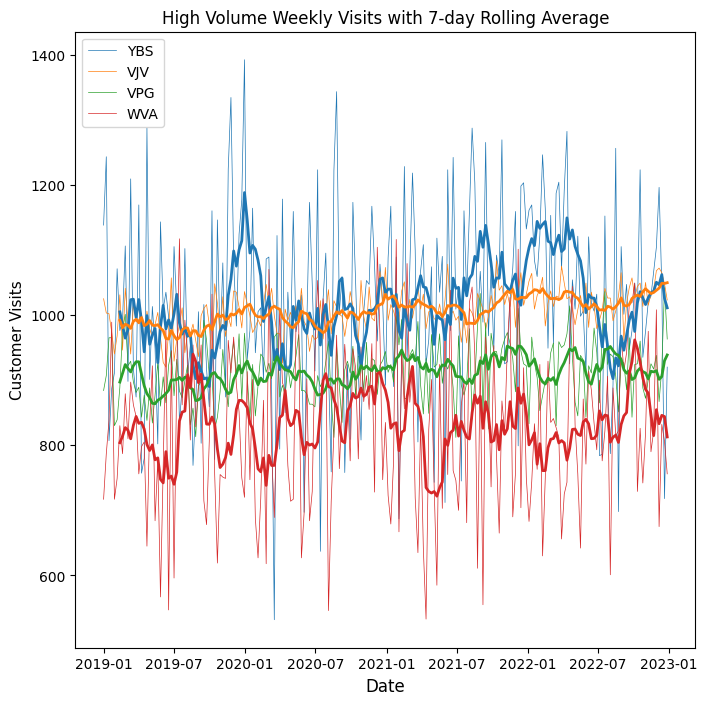

In [ ]:
period = 7
rolling_average = customer_data.rolling(window=period).mean()

selected = ['YBS', 'VJV', 'VPG', 'WVA']
print(customer_data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(customer_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Customer Visits', fontsize=11)
plt.title('High Volume Weekly Visits with 7-day Rolling Average', fontsize=12)
plt.legend(selected, loc=2)
plt.show()

# **Line plot for High & Medium Volume Cinemas Weekly Visitors**

             YBS   VJV  VPG  WVA  WBK  TPY  TJN  UVQ
Date                                                
2019-01-01  1138  1025  884  717  563  447  441  388
2019-01-08  1243  1003  907  787  595  513  496  398
2019-01-15   807  1002  965  838  414  467  534  367
2019-01-22   887   973  965  989  427  449  328  404
2019-01-29   911   940  830  717  424  442  471  309


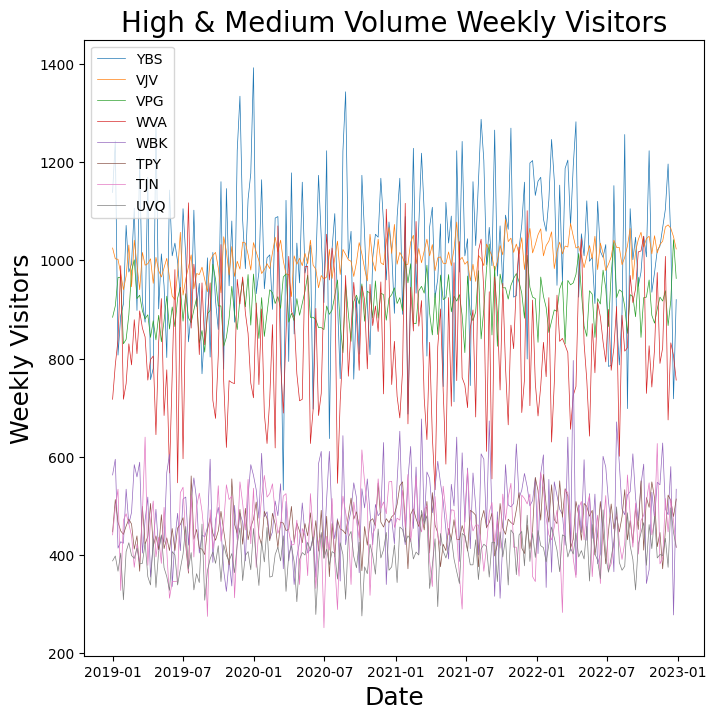

In [ ]:
selected = ['YBS', 'VJV', 'VPG', 'WVA', 'WBK', 'TPY', 'TJN', 'UVQ']
print(customer_data[selected].head())

# customer_data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(customer_data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weekly Visitors', fontsize=18)
plt.title('High & Medium Volume Weekly Visitors', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

             YBS   VJV  VPG  WVA  WBK  TPY  TJN  UVQ
Date                                                
2019-01-01  1138  1025  884  717  563  447  441  388
2019-01-08  1243  1003  907  787  595  513  496  398
2019-01-15   807  1002  965  838  414  467  534  367
2019-01-22   887   973  965  989  427  449  328  404
2019-01-29   911   940  830  717  424  442  471  309


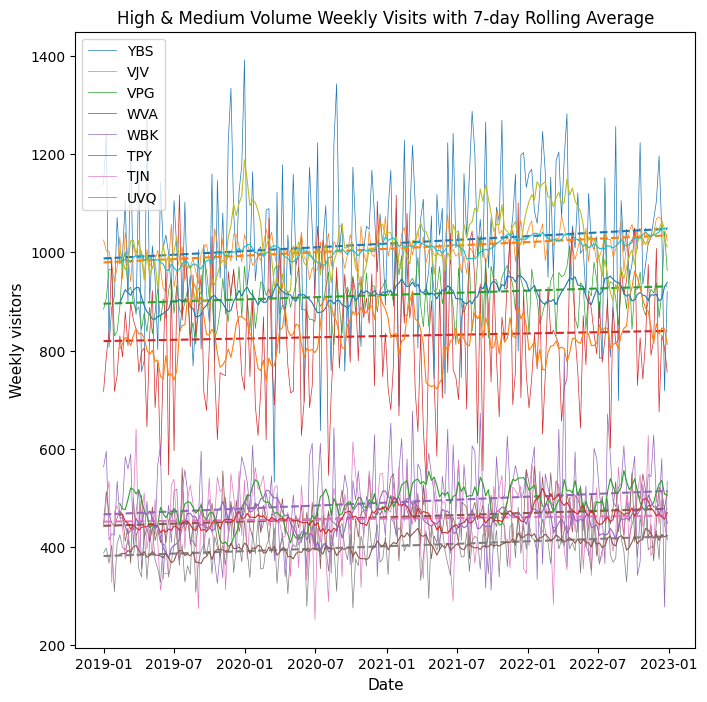

In [ ]:
period = 7
rolling_average = customer_data.rolling(window=period).mean()

selected = ['YBS', 'VJV', 'VPG', 'WVA', 'WBK', 'TPY', 'TJN', 'UVQ']
print(customer_data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(customer_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(customer_data[name]))
    z = np.polyfit(x, customer_data[name], 1)
    trend = np.poly1d(z)
    plt.plot(customer_data.index, trend(x), linestyle='--')
plt.plot(rolling_average[selected], linewidth=0.8)
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Weekly visitors', fontsize=11)
plt.title('High & Medium Volume Weekly Visits with 7-day Rolling Average', fontsize=12)
plt.legend(selected, loc=2)
plt.show()

# **Line plot for Very Low Volume Cinemas Weekly Visitors**

            BWF  ZQL  BKK  CCX  BQV  AKA  SDT  CWN
Date                                              
2019-01-01  193  119    0    0    0    0    0    0
2019-01-08  175  106    0    0    0    0    0    0
2019-01-15  142  122    0    0    0    0    0    0
2019-01-22  190  135    0    0    0    0    0    0
2019-01-29  159   94    0    0    0    0    0    0
2019-02-05  169  126    0    0    0    0    0    0
2019-02-12  180  116    0    0    0    0    0    0
2019-02-19  226  106    0    0    0    0    0    0
2019-02-26  104  131    0    0    0    0    0    0
2019-03-05  181  173    0    0    0    0    0    0


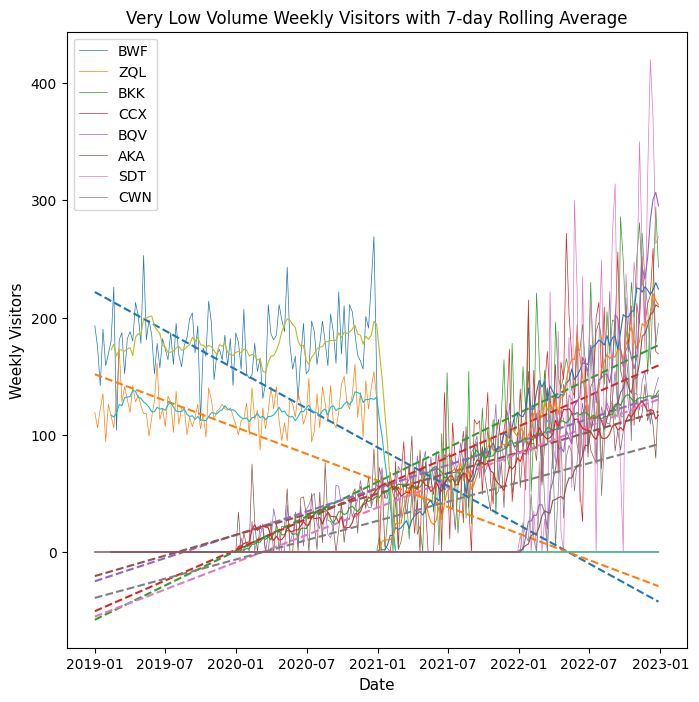

In [ ]:
period = 7
rolling_average = customer_data.rolling(window=period).mean()

very_low_selected = ['BWF', 'ZQL', 'BKK', 'CCX', 'BQV', 'AKA', 'SDT', 'CWN']
print(customer_data[very_low_selected].head(10))

plt.figure(figsize=(8, 8))
plt.plot(customer_data[very_low_selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in very_low_selected:
    x = np.arange(len(customer_data[name]))
    z = np.polyfit(x, customer_data[name], 1)
    trend = np.poly1d(z)
    plt.plot(customer_data.index, trend(x), linestyle='--')
plt.plot(rolling_average[very_low_selected], linewidth=0.8)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Weekly Visitors', fontsize=11)
plt.title('Very Low Volume Weekly Visitors with 7-day Rolling Average', fontsize=12)
plt.legend(very_low_selected, loc=2)
plt.show()

In [ ]:
year_2021_data = customer_data[very_low_selected][('2020-10'):('2021-05')]
print(year_2021_data)

            BWF  ZQL  BKK  CCX  BQV  AKA  SDT  CWN
Date                                              
2020-10-06  210  150    0    0   21    8    0    0
2020-10-13  152  128    0    0   23   29    0    0
2020-10-20  211  122    0    0   46   28    0    0
2020-10-27  205  134    0    0   30   49    0    0
2020-11-03  186  160    0    0   38   54    0    0
2020-11-10  168  115    0    0   44   16    0    0
2020-11-17  163  136    0    0   61   56    0    0
2020-11-24  156   98    0    0   47   50    0    0
2020-12-01  201  146    0    0   44   37    0    0
2020-12-08  191  122    0    0   38   65    0    0
2020-12-15  229  140    0    0   38   39    0    0
2020-12-22  269  154    0    0   47   88    0    0
2020-12-29  151  131    0    0   58   38    0    0
2021-01-05    0    0   13    0   53   72    0    0
2021-01-12    0    0    0   65   72   61    0    0
2021-01-19    0    0    0    5   46   46    0    0
2021-01-26    0    0   28    3   52   46    0    0
2021-02-02    0    0   58    0 

# **Creating Summary Dataframe**
This includes summary data of the ChrisCo portfolio that has been split up into columns of variables.

In [ ]:
average_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaAge.csv', index_col=0)
seating_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaCapacity.csv', index_col=0)
avg_marketing_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaMarketing.csv', index_col=0)
avg_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaOverheads.csv', index_col=0)
average_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001356090/CinemaSpend.csv', index_col=0)

summary_data = pd.DataFrame(index=customer_data.columns)
summary_data['Avg Age of Visitors'] = average_age.values
summary_data['Seating Capacity'] = seating_capacity.values
summary_data['Annual Marketing Spend(£000s)'] = avg_marketing_spend.values
summary_data['Annual Overheads (£000s)'] = avg_overheads.values
summary_data['Avg Customer Spend'] = average_spend.values

print(summary_data.head())

     Avg Age of Visitors  Seating Capacity  Annual Marketing Spend(£000s)  \
YBS                   35               165                              4   
VJV                   45               184                             14   
VPG                   32                37                              2   
WVA                   34               125                              5   
WBK                   33                98                              3   

     Annual Overheads (£000s)  Avg Customer Spend  
YBS                        99                  18  
VJV                        87                  24  
VPG                        49                  11  
WVA                        70                  12  
WBK                        84                  16  


# **Subplot of Data**
This presents a subplot of variables within the summary dataframe

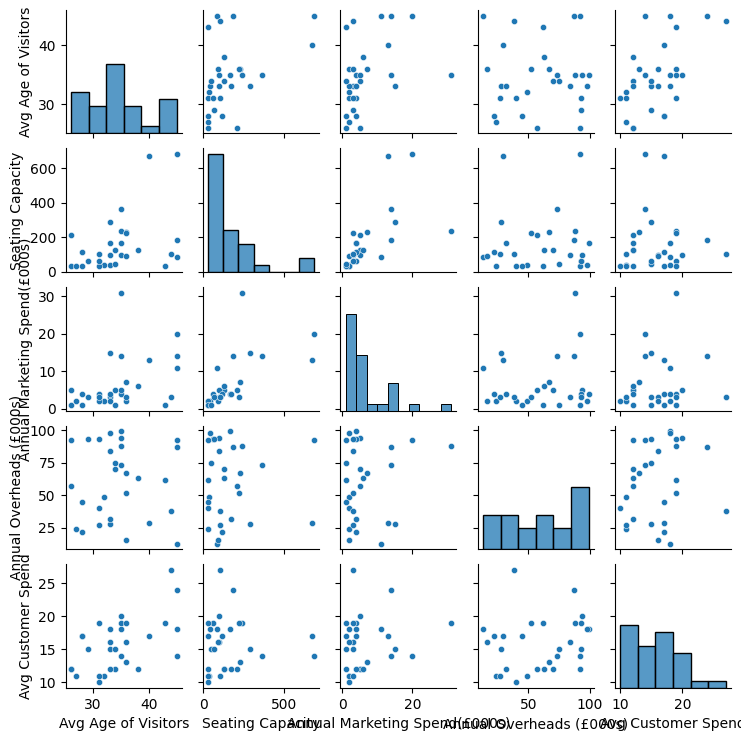

In [ ]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

# **RadarPlot of 'Primary' Cinema Variables**
Visual comparison between high volume cinema attributes

     Avg Age of Visitors  Seating Capacity  Annual Marketing Spend(£000s)  \
YBS             0.777778          0.241935                       0.129032   
VJV             1.000000          0.269795                       0.451613   
VPG             0.711111          0.054252                       0.064516   
WVA             0.755556          0.183284                       0.161290   
WBK             0.733333          0.143695                       0.096774   

     Annual Overheads (£000s)  Avg Customer Spend  
YBS                  1.000000            0.666667  
VJV                  0.878788            0.888889  
VPG                  0.494949            0.407407  
WVA                  0.707071            0.444444  
WBK                  0.848485            0.592593  


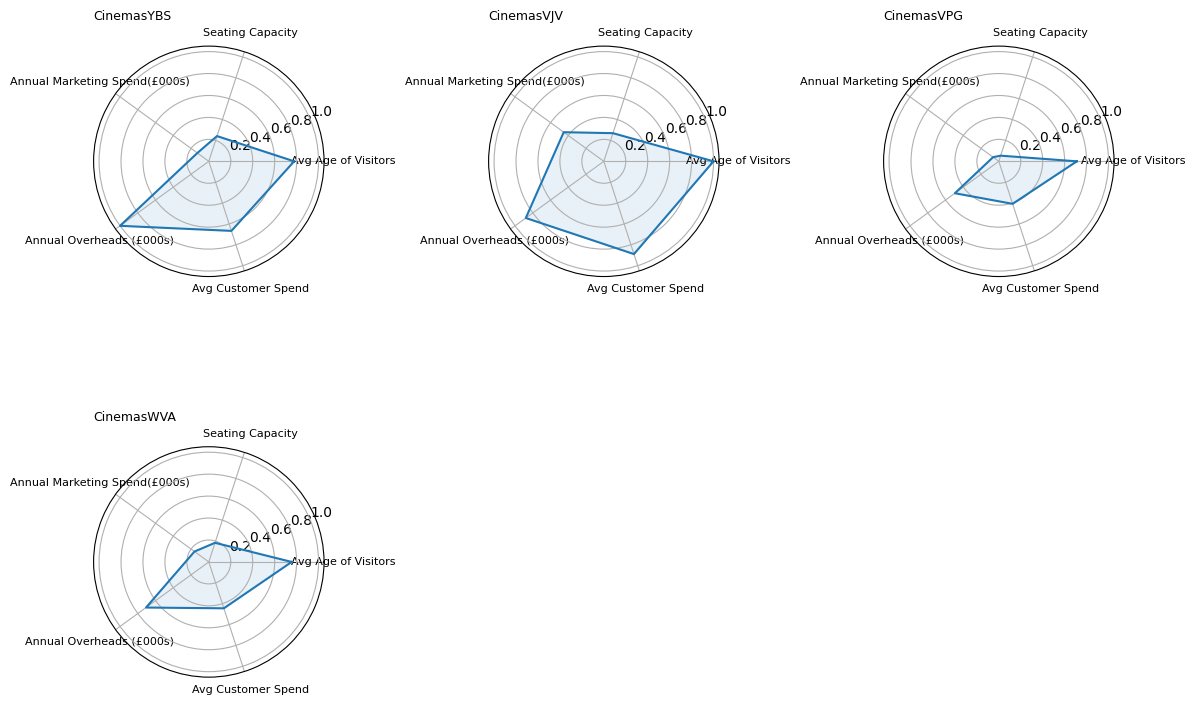

In [ ]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['YBS', 'VJV', 'VPG', 'WVA']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(12, 12))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Cinemas' + name, fontsize=9, loc='left')
    counter += 1
plt.tight_layout()
plt.show()


# **Total Profit of High and Medium Volume Cinemas**
The total of weekly visitors over the 4 year period

YBS    3416024
VJV    4646608
VPG    1894932
WVA    1780536
WBK    1291648
dtype: int64


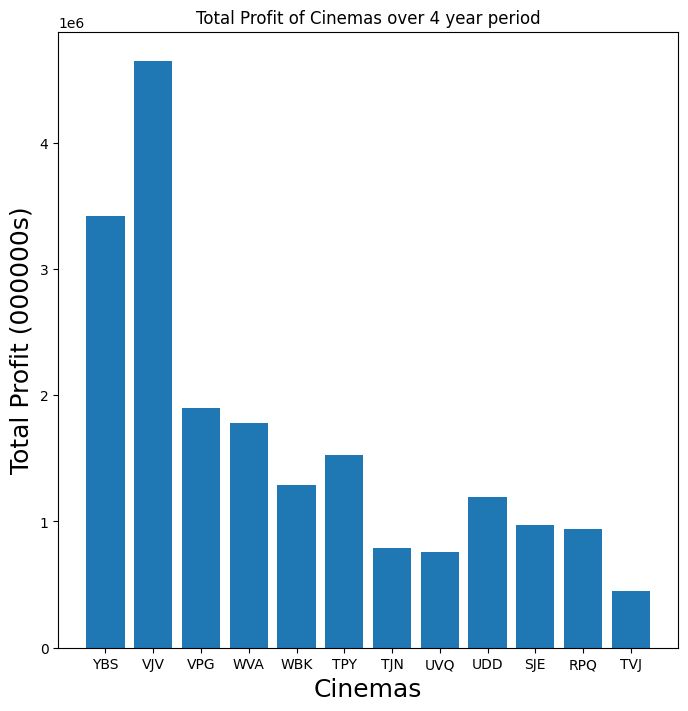

In [ ]:
high_medium_selected = ['YBS', 'VJV', 'VPG', 'WVA', 'WBK', 'TPY', 'TJN', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']

cinema_revenue = customer_data.sum() * summary_data['Avg Customer Spend']
overall_costs = (summary_data['Annual Marketing Spend(£000s)'] + summary_data['Annual Overheads (£000s)'])*4000
cinema_profit = cinema_revenue - overall_costs
print(cinema_profit.head())

summary_data['Total Profit'] = cinema_profit.values

index_cinema_high = summary_data[summary_data.index.isin(high_medium_selected)]


plt.figure(figsize=(8, 8))
x_pos = np.arange(len(index_cinema_high.index))
plt.bar(x_pos, index_cinema_high['Total Profit'], align='center')
plt.xticks(x_pos, index_cinema_high.index)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('Total Profit (000000s)', fontsize=18)
plt.title('Total Profit of Cinemas over 4 year period', fontsize=12)
plt.show()

# **Interactive Heatmap**
Showcasing the correlation between cinema attributes. Added in secondary attributes 'total weekly visitors' and 'profit' as additional variables for providing insight

In [ ]:
summary_data['Total Weekly Visitors'] = total_customers.values

plot = summary_data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title=' Correlation between Cinema attributes',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))

hvplot.extension('bokeh')
plot

:HeatMap   [columns,index]   (value)

# **Interactive Bubble Plot**
A scatter plot between marketing and average customer spend that showcases the difference in profit by bubble size

In [ ]:
summary_data['BubbleSize'] = summary_data['Total Profit'] * 0.0005

plot = summary_data.hvplot.scatter(
    frame_height=500, frame_width=500,
    title='Marketing vs Avg Customer Spend (vs Profit)',
    xlabel='Marketing (£000s)', ylabel='Avg Customer Spend',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x= 'Annual Marketing Spend(£000s)', y='Avg Customer Spend', size='BubbleSize',
)
hvplot.extension('bokeh')
plot

/usr/local/lib/python3.10/dist-packages/holoviews/util/transform.py:672: RuntimeWarning: invalid value encountered in sqrt
  data = fn(*args, **kwargs)


:Scatter   [Annual Marketing Spend(£000s)]   (Avg Customer Spend,BubbleSize,index,Avg Age of Visitors,Seating Capacity,Annual Overheads (£000s),Total Profit,Total Weekly Visitors)

# **Autocorrelation**
Exploring the prescence of seasonality in data

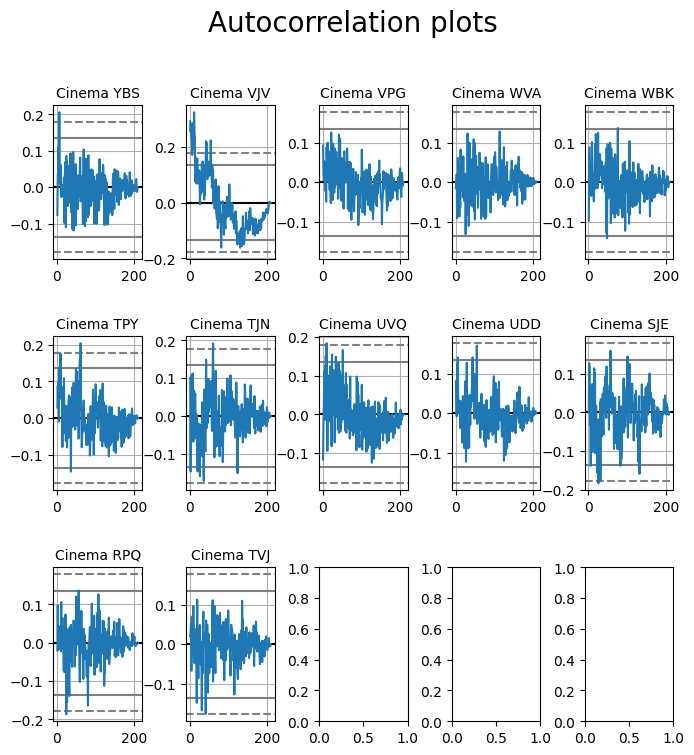

In [ ]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(8, 8), nrows=3, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in customer_data[high_medium_selected].columns:
    sub = pd.plotting.autocorrelation_plot(customer_data[high_medium_selected][name], axes[row, col])
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

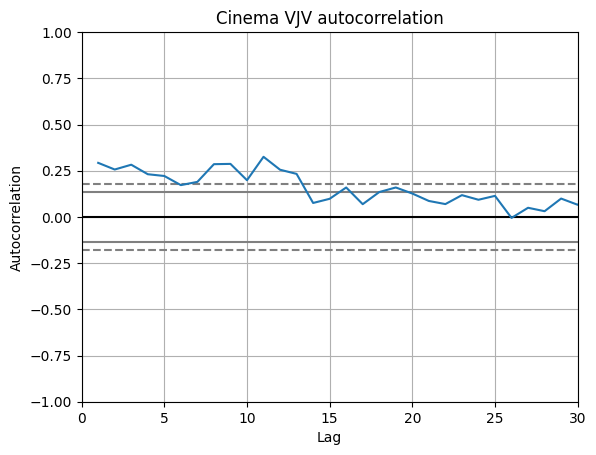

In [ ]:
pd.plotting.autocorrelation_plot(customer_data['VJV'])
plt.title('Cinema VJV autocorrelation' )
plt.xlim([0,30])
plt.show()